In [1]:
import pandas as pd
import numpy as np
import tweepy 
from datetime import datetime 
start_time = datetime.now() 


In [2]:
df = pd.read_csv("name_descriptions.csv")
df

,Original Name,Gender,Description,Location
0,ABEBE,male,one who wards off,African
1,ABEL,male,"breath , vapor ; transitoriness",African
2,ABIDEMI,male,I am Father reborn ( ? ),African
3,ABIMBOLA,male,born to be rich,African
4,ABIOYE,male,born during coronation,African
...,...,...,...,...
28164,ZISSELE,female,"Pet form of Yiddish Zisse , meaning `` sweet . ''",Yiddish
28165,ZLATA,female,"Yiddish form of Polish Złota , meaning `` gold...",Yiddish
28166,ZLATE,female,"Variant form of Yiddish Zlata , meaning `` gol...",Yiddish
28167,ZOFIA,female,"Variant spelling of Yiddish Tzofiya , meaning ...",Yiddish


In [3]:
df2 = df
df2 = df2.drop(columns = ['Gender', 'Location'])
df2

,Original Name,Description
0,ABEBE,one who wards off
1,ABEL,"breath , vapor ; transitoriness"
2,ABIDEMI,I am Father reborn ( ? )
3,ABIMBOLA,born to be rich
4,ABIOYE,born during coronation
...,...,...
28164,ZISSELE,"Pet form of Yiddish Zisse , meaning `` sweet . ''"
28165,ZLATA,"Yiddish form of Polish Złota , meaning `` gold..."
28166,ZLATE,"Variant form of Yiddish Zlata , meaning `` gol..."
28167,ZOFIA,"Variant spelling of Yiddish Tzofiya , meaning ..."


In [4]:
t1 = []

for i in range(len(df2['Original Name'])):
    q = df2.loc[df['Description'] == df['Description'][i]]
    tup = (''.join(set(q['Description'])),(list(q['Original Name'])))
    t1.append(tup)
    
res_df = pd.DataFrame(t1, columns=['Description', 'Original Name'])
res_df

,Description,Original Name
0,one who wards off,"[ABEBE, ABEBI]"
1,"breath , vapor ; transitoriness",[ABEL]
2,I am Father reborn ( ? ),[ABIDEMI]
3,born to be rich,[ABIMBOLA]
4,born during coronation,[ABIOYE]
...,...,...
28164,"Pet form of Yiddish Zisse , meaning `` sweet . ''",[ZISSELE]
28165,"Yiddish form of Polish Złota , meaning `` gold...",[ZLATA]
28166,"Variant form of Yiddish Zlata , meaning `` gol...",[ZLATE]
28167,"Variant spelling of Yiddish Tzofiya , meaning ...",[ZOFIA]


In [5]:
n1 = []
for i in range(len(res_df)):
    for j in range(len(res_df['Original Name'][i])):
        if len(res_df['Original Name'][i]) > 1:
            n2 = (res_df['Description'][i], res_df['Original Name'][i][j])
            n1.append(n2)
            
dff = pd.DataFrame(n1, columns=['Description', 'Original Name'])
dff

,Description,Original Name
0,one who wards off,ABEBE
1,one who wards off,ABEBI
2,"I am grave , or , I speak gravely",ADISA
3,"I am grave , or , I speak gravely",ADISA
4,second-born of twins,ADONGO
...,...,...
40059,"Yiddish form of Hebrew Yehuwdiyth , meaning ``...",YUTKE
40060,"Variant spelling of Yiddish Zelda , meaning ``...",SELDA
40061,"Variant spelling of Yiddish Zelda , meaning ``...",ZELDE
40062,Yiddish name meaning `` sweet . '',SISEL


In [6]:
dff = dff.drop_duplicates()
dff

,Description,Original Name
0,one who wards off,ABEBE
1,one who wards off,ABEBI
2,"I am grave , or , I speak gravely",ADISA
4,second-born of twins,ADONGO
6,born on Wednesday,AKUA
...,...,...
40047,"Variant spelling of Yiddish Sheina , meaning `...",SHAINA
40048,"Variant spelling of Yiddish Sheina , meaning `...",SHAYNA
40049,"Variant spelling of Yiddish Sheina , meaning `...",SHEINE
40056,Yiddish name meaning `` sweet . '',SISEL


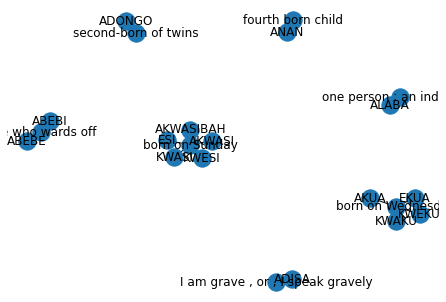

In [7]:
import pandas as pd
import networkx as nx

G = nx.from_pandas_edgelist(dff[:15], 'Description', 'Original Name')
nx.draw(G, with_labels=True)

In [8]:
li = [res_df['Original Name'][i] for i in range(len(res_df['Original Name'])) if len(res_df['Original Name'][i]) > 1]
li3 = []
for i in li:
    if i not in li3:
        li3.append(i)
for i in range(len(li3)):
    li3[i] = set(li3[i])

In [9]:
new_li3 = []
for i in li3:
    if len(i)>1:
        new_li3.append(i)

In [10]:
fin1 = []
fin2 = []
for p in new_li3:
    d = [(i,j) for i in p for j in p if i!=j]
    for j in d:
        fin1.append(j[0])
        fin2.append(j[1])
f = {'Source' : fin1, 'Target' : fin2}

In [11]:
dfd = pd.DataFrame(f)
dfd

,Source,Target
0,ABEBE,ABEBI
1,ABEBI,ABEBE
2,AKUA,KWAKU
3,AKUA,EKUA
4,AKUA,KWEKU
...,...,...
21713,SHAINA,SHAYNA
21714,SHAYNA,SHEINE
21715,SHAYNA,SHAINA
21716,ZISSE,SISEL


In [12]:
dfd.to_csv('names_source_target.csv', index = False)

In [13]:
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Time elapsed in (hh:mm:ss.ms): "0:00:39.866983"
